# unsuperised machine learning/ clustering

Dataset : https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Datasets/Mall_Customers.csv

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Data ingestion
df = pd.read_csv("https://github.com/NelakurthiSudheer/Mall-Customers-Segmentation/raw/main/Dataset/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.shape

(200, 4)

In [6]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='count'>

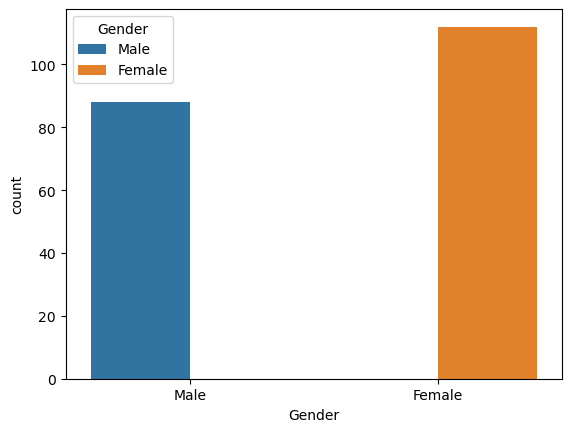

In [8]:
sns.countplot(data=df, x="Gender", hue="Gender")

In [9]:
df.Age.max(), df.Age.min()

(70, 18)

In [10]:
def grouping(x):
    if x>10 and x<=20:
        return "10-20"
    elif x>20 and x<=30:
        return "20-30"
    elif x>30 and x<=40:
        return "30-40"
    elif x>40 and x<=50:
        return "40-50"
    elif x>50 and x<=60:
        return "50-60"
    elif x>70 and x<=80:
        return "70-80"
    elif x>80 and x<=90:
        return "80-90"

In [11]:
df["Age_group"] = df.Age.apply(lambda x: grouping(x))

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_group
0,Male,19,15,39,10-20
1,Male,21,15,81,20-30
2,Female,20,16,6,10-20
3,Female,23,16,77,20-30
4,Female,31,17,40,30-40


<AxesSubplot: xlabel='count', ylabel='Age_group'>

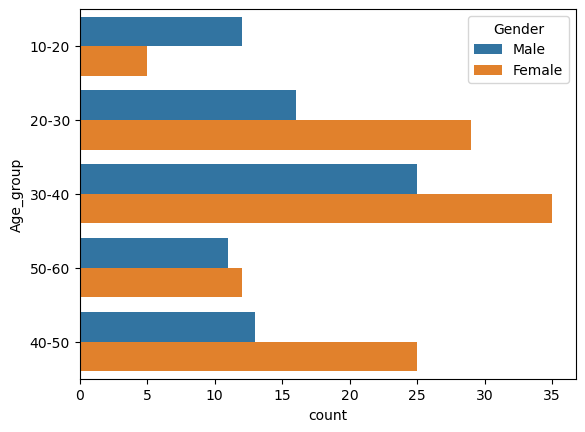

In [13]:
sns.countplot(data=df, y="Age_group", hue="Gender")


# Bi-variate Clustering 
## K-means algorithm


In [14]:
# importing libreries
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
# clustering datase preperation
data = df.iloc[:,-3:-1]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'Before Clustering')

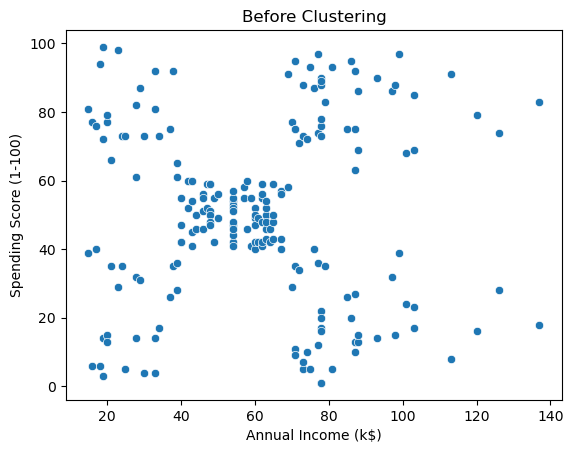

In [16]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Before Clustering")

In [17]:
X = data.to_numpy()


In [18]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

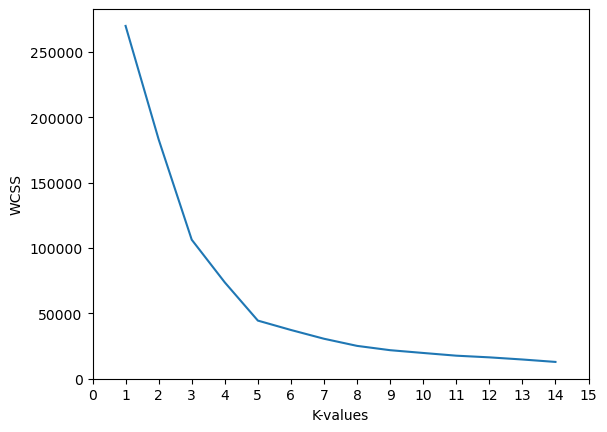

In [19]:
# ELBOW curve
plt.plot(range(1,15), wcss)
plt.xticks(range(0,16))
plt.xlabel("K-values")
plt.ylabel("WCSS")
plt.show()

## unable to conclude the Optimal value of k using ELBOW curve

In [20]:
silh=[]
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    labels =  kmeans.labels_
    silh.append(silhouette_score(X, labels, metric='euclidean'))

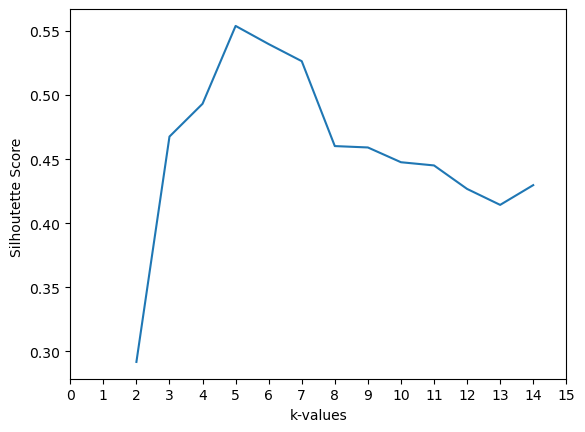

In [21]:
# Silhouette Value-versus-k plot.
plt.plot(range(2,15), silh)
plt.xticks(range(0,16))
plt.xlabel("k-values")
plt.ylabel("Silhoutette Score ")
plt.show()

## Global maxima at k=5
## Optimal value of k is 5

In [22]:
best_kmeans_model = KMeans(n_clusters=5, init= 'k-means++')

In [23]:
best_kmeans_model.fit(X)

KMeans(n_clusters=5)

### Plot of the Clusters

In [25]:
labels = best_kmeans_model.labels_

In [24]:
centroids = best_kmeans_model.cluster_centers_

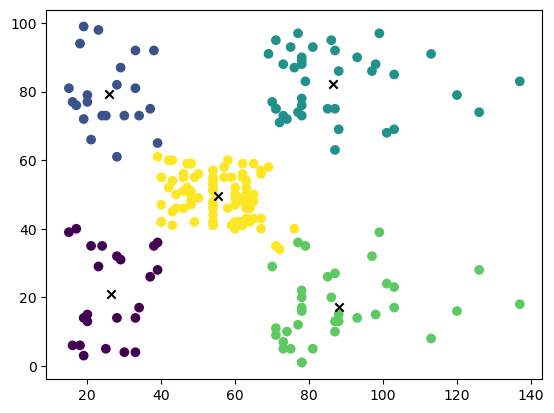

In [42]:
plt.scatter(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"], c=labels)
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='x')
plt.title("After Clustering")

In [44]:
silhouette_score(X,labels)

0.553931997444648

### Accuracy obtained by using K-means method = 55%

## Hierarchical Clustering

In [66]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [72]:
hier_clus = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage='ward')  

In [74]:
hier_clus = hier_clus.fit(X)

In [82]:
labels=hier_clus.fit_predict(X)

Text(0.5, 1.0, 'After Clustering')

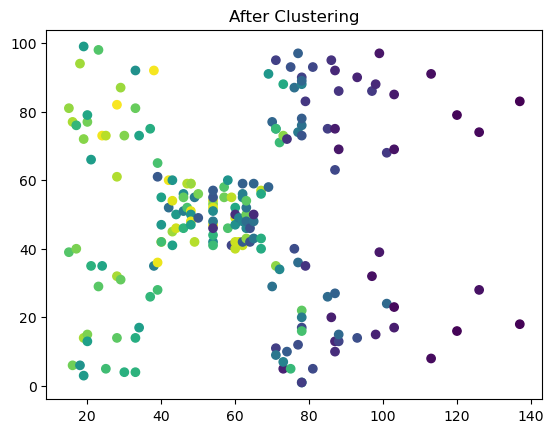

In [83]:
plt.scatter(x=data["Annual Income (k$)"], y=data["Spending Score (1-100)"], c=labels)
# plt.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='x')
plt.title("After Clustering")

In [84]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

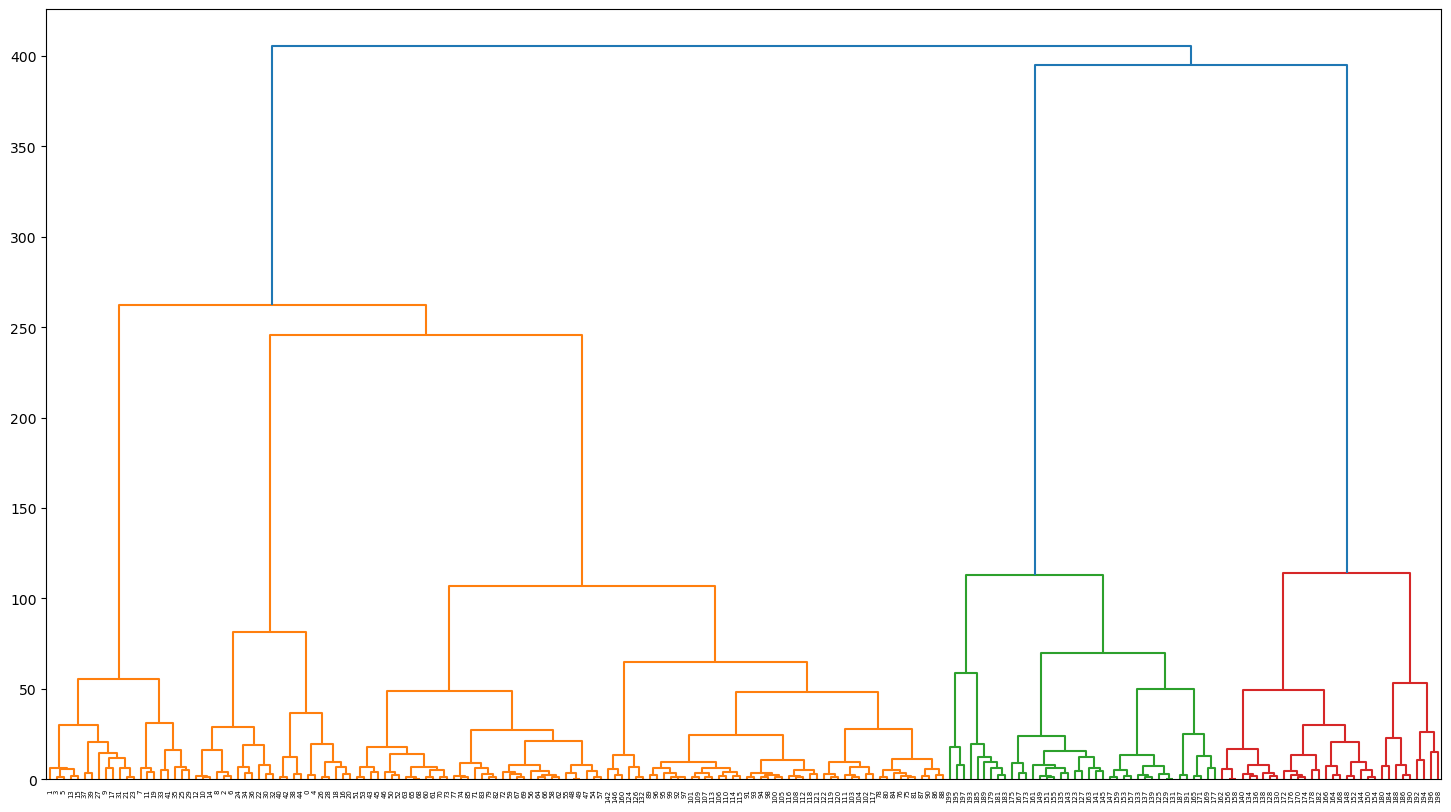

In [88]:
plt.figure(figsize=(18,10))
plot_dendrogram(hier_clus, truncate_mode="level")